# Taller 2 Ciencia de Datos Aplicada (CDA)

Estudiante: Juan Nicolás Estepa Guzmán

Código: 20234933

Ciudad utilizada: Madrid, España

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [3]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Cargue de dataset obtenido

In [4]:
listings_df = pd.read_csv("./listings.csv.gz")

In [5]:
#Obtener el tamaño del dataset
listings_df.shape

(26924, 75)

In [6]:
#Visualización de las primeras 5 filas del dataset para conocer la distribución de la información
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1104967621421098322,https://www.airbnb.com/rooms/1104967621421098322,20240615011404,2024-06-15,city scrape,"Habitación de lujo, baño privado",NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,565307927,https://www.airbnb.com/users/show/565307927,Carolina,2024-03-04,"Madrid, Spain",Hola; mi nombre es Carolina; te aseguro una es...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Pacífico,Retiro,40.406980,-3.675015,Private room in rental unit,Private room,2,1.0,1 bath,1.0,0.0,[],$68.00,1,30,1,1,30,30,1.0,30.0,NaN,t,2,2,2,2,2024-06-15,2,2,0,2024-03-10,2024-05-08,4.50,5.00,5.00,5.0,5.00,5.00,5.00,NaN,f,1,0,1,0,0.61
1,930941073152690361,https://www.airbnb.com/rooms/930941073152690361,20240615011404,2024-06-15,city scrape,habitación para pareja,Rent room for loose nights or weekends to a c...,NaN,https://a0.muscache.com/pictures/85f0b383-e8f8...,442944608,https://www.airbnb.com/users/show/442944608,Jonathan Jesus,2022-01-31,"Madrid, Spain",somos una pareja de dos chicos respetuosos y ...,a few days or more,0%,57%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2.0,4.0,['phone'],t,t,NaN,San Diego,Puente de Vallecas,40.392100,-3.670030,Private room in rental unit,Private room,2,1.0,1 bath,1.0,1.0,"[""Wifi""]",$16.00,1,365,1,1,365,365,1.0,365.0,NaN,t,0,8,18,185,2024-06-15,3,3,0,2023-07-29,2023-10-04,5.00,5.00,5.00,5.0,5.00,4.67,5.00,NaN,f,2,0,2,0,0.28
2,51647382,https://www.airbnb.com/rooms/51647382,20240615011404,2024-06-15,city scrape,Buenos Aires en Madrid,"This special place is close to everything, mak...",The neighborhood is m,https://a0.muscache.com/pictures/db018af4-f622...,252336445,https://www.airbnb.com/users/show/252336445,Norma,2019-03-31,"Madrid, Spain",Aire Fresco,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/62133...,https://a0.muscache.com/im/pictures/user/62133...,NaN,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Comunidad de Madrid, Spain",San Diego,Puente de Vallecas,40.395110,-3.671430,Private room in home,Private room,1,1.0,1 shared bath,2.0,3.0,"[""Outdoor dining area"", ""TV"", ""Free parking on...",$25.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,21,51,81,356,2024-06-15,186,65,7,2021-08-17,2024-05-29,4.67,4.71,4.59,4.8,4.83,4.51,4.61,NaN,t,2,0,2,0,5.40
3,1026072412626070839,https://www.airbnb.com/rooms/1026072412626070839,20240615011404,2024-06-15,city scrape,Habitación Madrid Rio!,Enjoy the simplicity of this quiet and central...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,545435841,https://www.airbnb.com

In [7]:
# Obtener el tipo de dato de cada columna, para el análisis de algunas de ellas a futuro
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

## 2. Análisis univariado

Se va a realizar el análisis univariado de 5 variables disponibles en el dataset, definidas a criterio personal. Dichas variables son las siguientes, se daran como nombre general y nombre dentro del dataset:

* Barrio: "neighbourhood_cleansed"
* Tipo de vivienda: "room_type"
* Precio: "price"
* Puntaje del lugar: "review_scores_location"
* Cantidad de reviews en el último año: "number_of_reviews_ltm"

### Análisis univariado variable: Barrio

In [8]:
#Revisar cantidad de nombres únicos de los barrios de la ciudad, esto se hace para corroborar que no haya algún nombre mal escrito que pueda hacer parte
#de un grupo ya existente
listings_df["neighbourhood_cleansed"].unique()

array(['Pacífico', 'San Diego', 'Opañel', 'Lista', 'Justicia',
       'Universidad', 'Palos de Moguer', 'Buenavista', 'Timón',
       'Puerta del Angel', 'Vallehermoso', 'Lucero', 'Chopera',
       'Gaztambide', 'Moscardó', 'San Isidro', 'Guindalera',
       'Embajadores', 'Canillejas', 'Ciudad Universitaria', 'Canillas',
       'Rios Rosas', 'Cortes', 'Los Rosales',
       'Casco Histórico de Vallecas', 'San Andrés', 'Palacio',
       'Valdeacederas', 'Sol', 'Trafalgar', 'Arapiles', 'Castellana',
       'Delicias', 'Castillejos', 'Ibiza', 'Acacias', 'Palomeras Sureste',
       'Comillas', 'Orcasitas', 'Pinar del Rey', 'Recoletos',
       'Peñagrande', 'Cuatro Caminos', 'Castilla', 'Butarque',
       'Palomeras Bajas', 'Rejas', 'Argüelles', 'Vista Alegre',
       'Berruguete', 'Alameda de Osuna', 'Campamento', 'San Cristobal',
       'Valdefuentes', 'Aluche', 'Numancia', 'Cármenes', 'Simancas',
       'Ciudad Jardín', 'Almenara', 'Casco Histórico de Vicálvaro',
       'Prosperidad', 'R

In [9]:
#Obtener cantidad de registros por cada barrio
listings_df["neighbourhood_cleansed"].value_counts(dropna=False)

neighbourhood_cleansed
Embajadores      3061
Universidad      2414
Palacio          1931
Sol              1449
Justicia         1333
                 ... 
Palomas             9
El Plantío          9
El Pardo            4
Fuentelareina       4
Atalaya             1
Name: count, Length: 127, dtype: int64

<Axes: xlabel='neighbourhood_cleansed'>

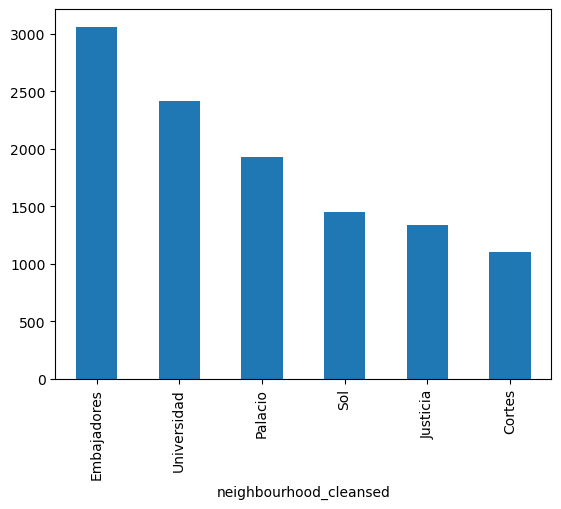

In [10]:
#Vamos a visualizar la información en un gráfico donde se muestren únicamente los barrios con más de 1000 registros
barrios_seleccionados = listings_df['neighbourhood_cleansed'].value_counts()[listings_df['neighbourhood_cleansed'].value_counts() > 1000]
barrios_seleccionados.plot(kind='bar')

### Análisis univariado variable: Tipo de vivienda

In [11]:
#Revisar cantidad de nombres únicos de tipos de vivienda en la ciudad, esto se hace para corroborar que no haya algún nombre mal escrito que pueda hacer parte
#de un grupo ya existente
listings_df["room_type"].unique()

array(['Private room', 'Shared room', 'Entire home/apt', 'Hotel room'],
      dtype=object)

In [12]:
#Obtener cantidad de registros por cada tipo de vivienda
listings_df["room_type"].value_counts(dropna=False)

room_type
Entire home/apt    17346
Private room        9103
Shared room          381
Hotel room            94
Name: count, dtype: int64

<Axes: ylabel='count'>

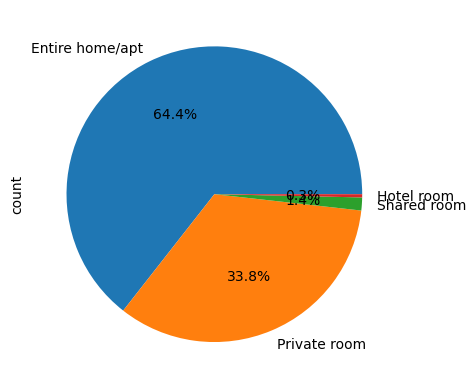

In [13]:
#Graficamos la cantidad por cada tipo de vivienda para conocer mejor la distribución
listings_df["room_type"].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')

In [14]:
#Obtenemos el calculo de la moda
moda_tipo_vivienda = listings_df['room_type'].mode()[0]
moda_tipo_vivienda

'Entire home/apt'

### Análisis univariado variable: Precio

In [15]:
#Modificamos el formato de la columna para dejarlo como un valor númerico
precio_float = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [16]:
promedio_precio = precio_float.mean()
promedio_precio

137.35393154486587

[]

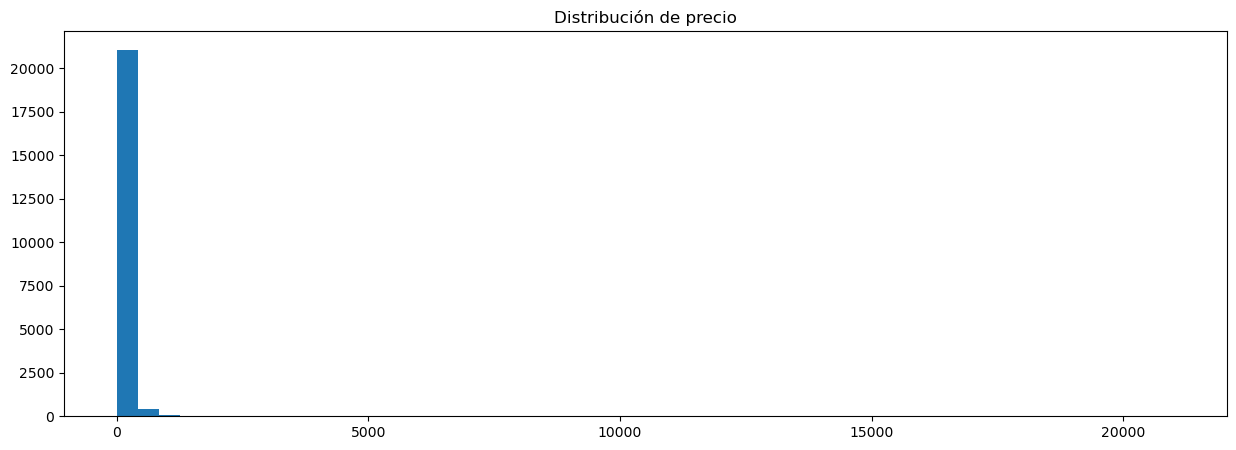

In [17]:
# Graficamos la información del precio mediante un histograma
plt.figure(figsize=(15, 5))
plt.hist(precio_float, bins=50)
plt.title("Distribución de precio")
plt.plot()

La información del gráfico no es muy apropiada para realizar el análisis, por lo que se va a utilizar un rango intercuartilico para delimitar más la información

In [18]:
q1 = precio_float.quantile(0.1)
q3 = precio_float.quantile(0.9)
iqr = q3 - q1

[]

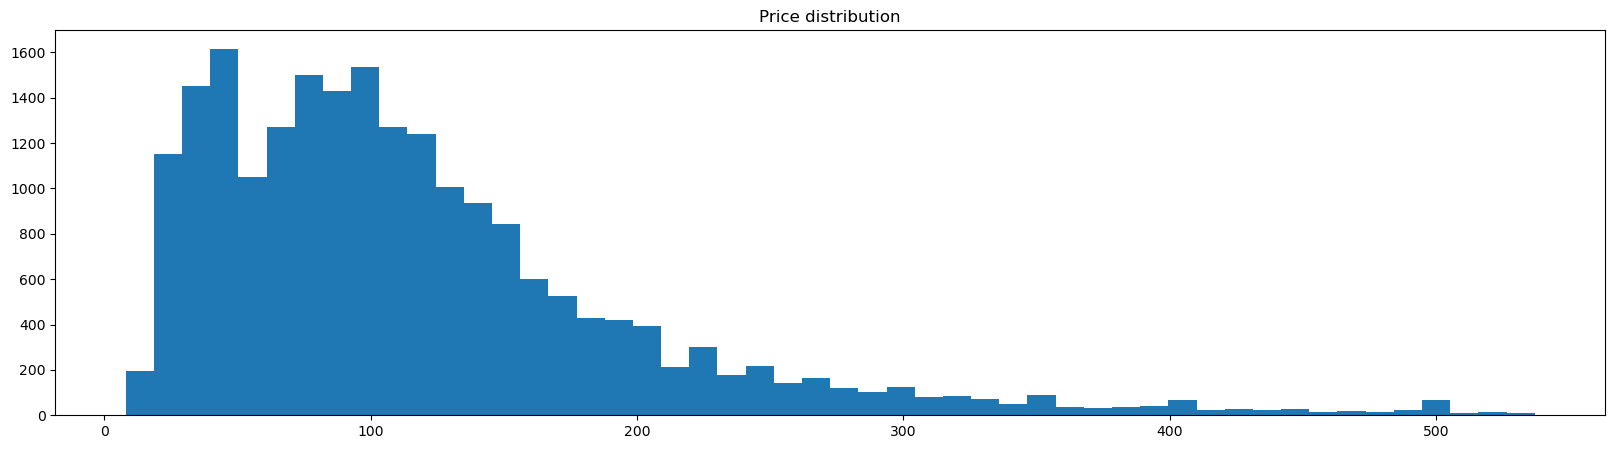

In [19]:
plt.figure(figsize=(20, 5))
plt.hist(precio_float[precio_float<= (q3 + 1.5 * iqr)], bins=50)
plt.title("Price distribution")
plt.plot()

In [20]:
q1 = precio_float.quantile(0.2)
q3 = precio_float.quantile(0.8)
iqr = q3 - q1

[]

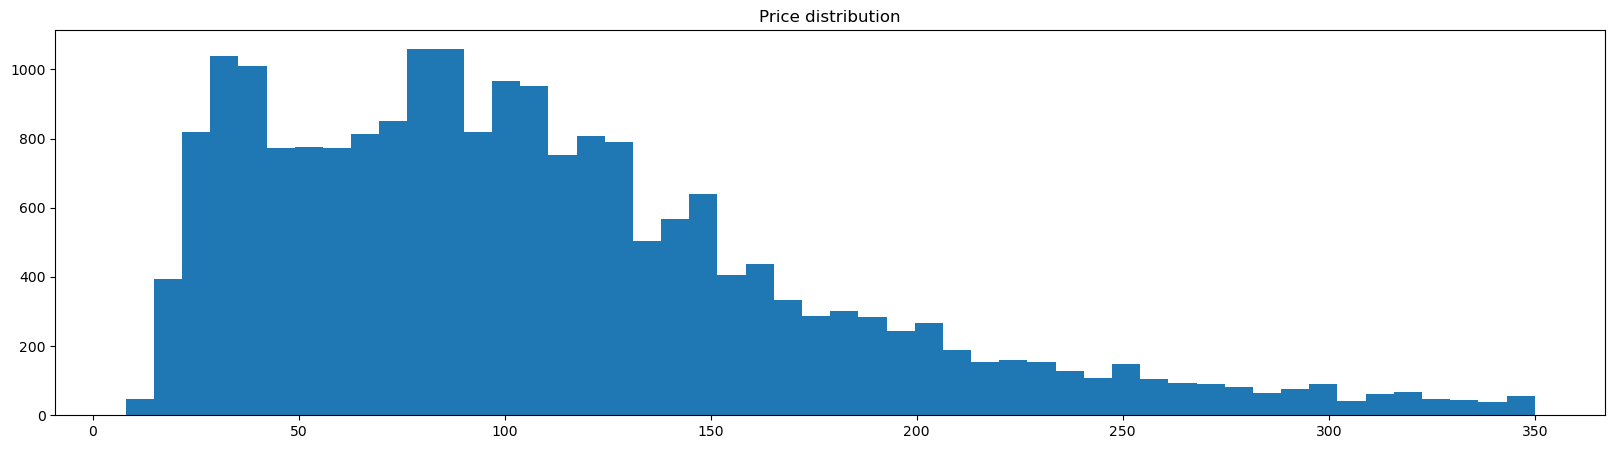

In [21]:
plt.figure(figsize=(20, 5))
plt.hist(precio_float[precio_float<= (q3 + 1.5 * iqr)], bins=50)
plt.title("Price distribution")
plt.plot()

### Análisis univariado variable: Puntaje del lugar

In [22]:
#Se obtiene el valor promedio de los puntajes generales dentro de la ciudad. No es necesario revisar si existen datos nulos o no en la columna, dado que
#la función ya los desprecia.
promedio_ciudad = listings_df['review_scores_location'].mean()
promedio_ciudad

4.759117199391173

### Análisis univariado variable: Cantidad de reviews en el último año

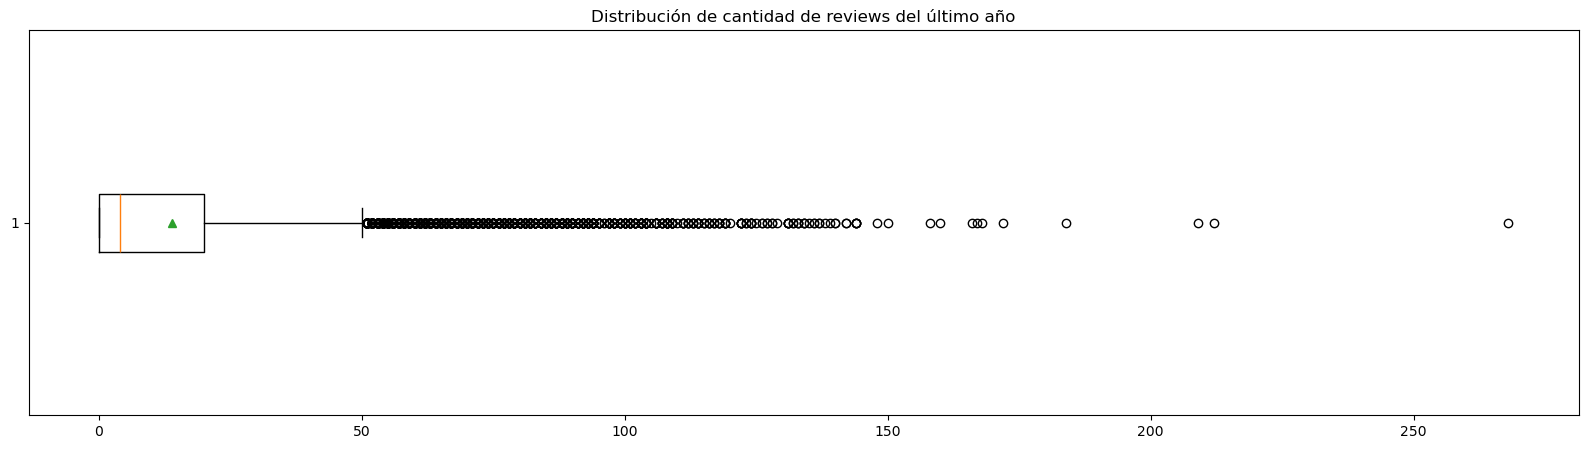

In [23]:
#Se utiliza un boxplot para revisar la distribución de la cantidad de reviews en toda la ciudad
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews_ltm"], showmeans=True, vert=False)
plt.title("Distribución de cantidad de reviews del último año")
plt.show()

## Resultados generales análisis univariado

A partir del análisis de las cinco variables definidas dentro del dataset, se puede observar a primera vista que existe un mayor favoritismo de las personas por tener viviendas de tipo "Entired home/apartment" donde se tiene más de un 60% del total de viviendas disponibles dentro de la plataforma de Airbnb. 

A su vez la ciudad de Madrid a nivel general tiene un promedio de puntaje en sus residencias de más de 4.7, lo que permite demostrar que es una buena invertir en esta ciudad en una vivienda de tipo Airbnb. De lo contrario se puede observar que no se tiene una gran cantidad de reseñas presentadas en las residencias a lo largo del último años, donde en promedio se tienen menos de 20 reseñas por vivienda. Este fenomeno se puede generar a raíz de que la mayor afluencia de personas utilizando estos servicios es en fechas específicas del año donde el turismo en la ciudad aumenta.

Finalmente, econtramos que el rango de precio que predomina en la ciudad de Madrid es de $137 lo cual es un poco elevado para lo que podrían considerar algunas personas, sin tener presente cuales son las prestaciones que brinda cada una de las viviendas ni su ubicación. Este puede ser un factor predominante al momento de definir en que sector de la ciudad ubicar una residencia nueva para airbnb.

## 3. Estrategia de análisis

A partir de los atributos más importantes definidos previamente, se van a definir las siguientes preguntas de negocio para obtener el análisis:

1. Delimitando a los dos tipos de vivienda más buscados en la ciudad, ¿Es más costoso uno sobre el otro?
2. Teniendo en cuenta que la ciudad tiene un promedio alto en el puntaje general de los hospedajes ¿El barrio más costoso tiene el mejor puntaje en la plataforma?

Teniendo en cuenta estas dos preguntas, se va a realizar primero un análisis en conjunto de las variables implicadas para conocer a detalle su información principal al momento de analizarla. Posteriormente, se obtendra un grafico de la distribucuión de cada uno de los elementos en cuestión para determinar cual tipo de prueba es mejor al momento de obtener una respesta frente a nuestras hipótesis nulas planteadas. Se va a tomar como valor de referencia para la aceptación **0.05**.

## 4. Desarrollo de la estrategia

### Pregunta 1

Delimitando a los dos tipos de vivienda más buscados en la ciudad, ¿Es más costoso uno sobre el otro?

In [24]:
vivienda_mas_buscada = ['Entire home/apt','Private room']   #Estos tipos de vivienda se definen a partir de lo obtenido en el análisis univariado

In [25]:
#Vamos a delimitar la información del dataset por tipo de vivienda, y obtener detalles que las relación con el precio
listings_df.loc[listings_df["room_type"].isin(vivienda_mas_buscada)].groupby('room_type')["price"].describe()

,count,unique,top,freq
room_type,,,,
Entire home/apt,14868,640,$100.00,233
Private room,6392,310,$40.00,260


In [26]:
#Se modifica el formato de la columna 'price' para obtener los resultados completos de los detalles de la relación
listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [27]:
listings_df.loc[listings_df["room_type"].isin(vivienda_mas_buscada)].groupby('room_type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,14868.0,166.343624,337.690981,8.0,91.0,123.0,175.0,21000.0
Private room,6392.0,70.506571,167.884859,8.0,31.0,44.0,65.0,9218.0


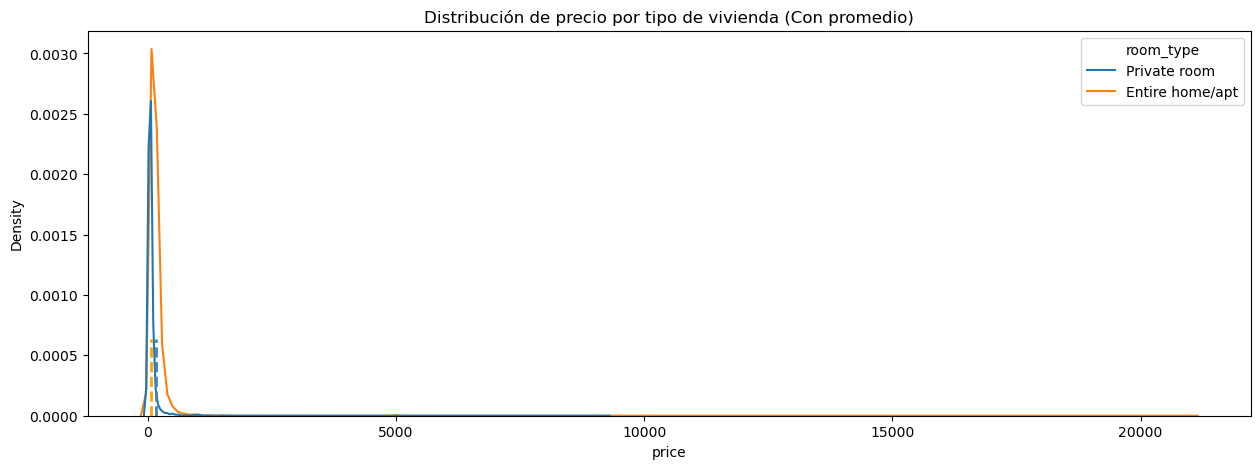

In [28]:
#Grafica de distribución de tipo de vivienda por precio
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(
    data=listings_df.loc[listings_df["room_type"].isin(vivienda_mas_buscada)],
    x="price",
    hue="room_type",
    ax=ax
)
for (tipo_vivienda, color) in zip(vivienda_mas_buscada, ["steelblue", "orange"]):
    ax.axvline(listings_df.loc[listings_df["room_type"] == tipo_vivienda, "price"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de precio por tipo de vivienda (Con promedio)")
plt.show()

In [29]:
#Se crea un dataset donde se eliminan los cuartiles de 0-20 y 80-100 de la columna precio. Esto se define gracias al análisis univariado del precio
#donde se encuentra una mejor distribución al no utilizar valores muy elevados que afecten la distribución correcta de la variable.
listings_20_80 = listings_df.loc[listings_df["price"] <= (q3 + 1.5 * iqr)]

In [30]:
#Obtenemos la información detallada del nuevo dataset para comprobar como se modifica al utilizar el rango intercuartilico
listings_20_80.loc[listings_20_80["room_type"].isin(vivienda_mas_buscada)].groupby('room_type')["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,14172.0,134.899097,62.178439,8.0,90.0,120.0,165.0,350.0
Private room,6268.0,56.854020,44.806453,8.0,31.0,44.0,64.0,350.0


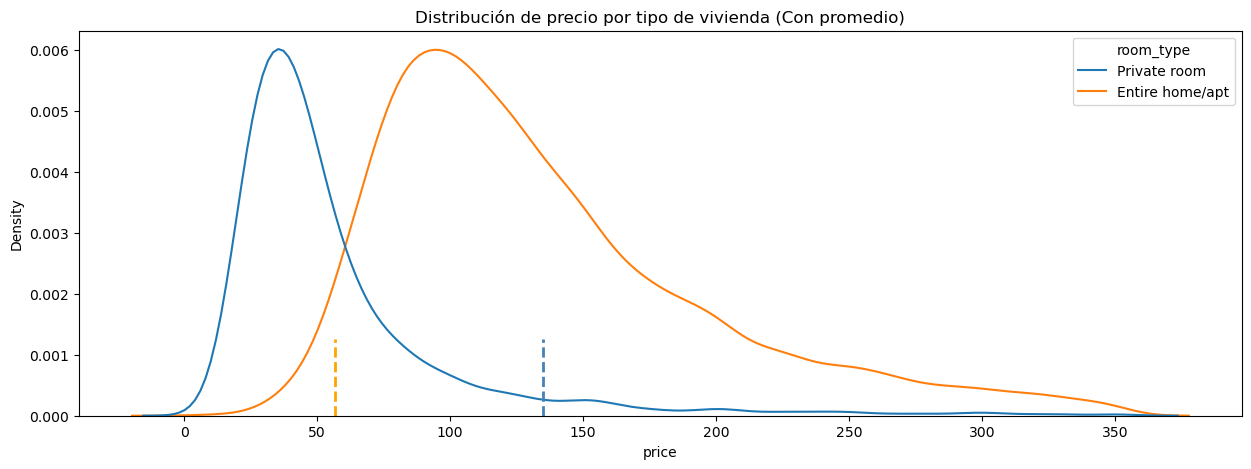

In [32]:
#Grafica de distribución de tipo de vivienda por precio
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(
    data=listings_20_80.loc[listings_20_80["room_type"].isin(vivienda_mas_buscada)],
    x="price",
    hue="room_type",
    ax=ax
)
for (tipo_vivienda, color) in zip(vivienda_mas_buscada, ["steelblue", "orange"]):
    ax.axvline(listings_20_80.loc[listings_20_80["room_type"] == tipo_vivienda, "price"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de precio por tipo de vivienda (Con promedio)")
plt.show()

In [33]:
alpha_p1 = 0.05    #Valor asumido para responder la hipotesis nula

In [34]:
#Para resolver la hipotesis nula se va a utilizar el test de Mann-Whitney, debido a que no se tiene una distribución normal por parte de las variables
stat, p_value = mannwhitneyu(
    listings_20_80.loc[listings_20_80["room_type"] == vivienda_mas_buscada[0], "price"],
    listings_20_80.loc[listings_20_80["room_type"] == vivienda_mas_buscada[1], "price"]
)

In [35]:
print('Estadístico de U:', stat)
print('Valor p:', p_value)

Estadístico de U: 80116629.0
Valor p: 0.0


Decisión

In [36]:
if p_value < alpha_p1:
    print(f"RECHAZA LA HIPOTESIS NULA: La diferencia en precio de entre {vivienda_mas_buscada[0]} y {vivienda_mas_buscada[1]} es siginificativa")
else:
    print(f"FALLO EN RECHAZAR LA HIPOTESIS NULA: La diferencia en precio de entre {vivienda_mas_buscada[0]} y {vivienda_mas_buscada[1]} no es siginificativa")

RECHAZA LA HIPOTESIS NULA: La diferencia en precio de entre Entire home/apt y Private room es siginificativa


### Pregunta 2

Teniendo en cuenta que la ciudad tiene un promedio alto en el puntaje general de los hospedajes ¿El barrio más costoso tiene el mejor puntaje en la plataforma?

In [37]:
#Antes de realizar cualquier análisis, se eliminan del dataset los elementos que no cuenten con una review.
listings_df = listings_df.dropna(subset=['review_scores_location'])
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1104967621421098322,https://www.airbnb.com/rooms/1104967621421098322,20240615011404,2024-06-15,city scrape,"Habitación de lujo, baño privado",NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,565307927,https://www.airbnb.com/users/show/565307927,Carolina,2024-03-04,"Madrid, Spain",Hola; mi nombre es Carolina; te aseguro una es...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Pacífico,Retiro,40.406980,-3.675015,Private room in rental unit,Private room,2,1.0,1 bath,1.0,0.0,[],68.0,1,30,1,1,30,30,1.0,30.0,NaN,t,2,2,2,2,2024-06-15,2,2,0,2024-03-10,2024-05-08,4.50,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.61
1,930941073152690361,https://www.airbnb.com/rooms/930941073152690361,20240615011404,2024-06-15,city scrape,habitación para pareja,Rent room for loose nights or weekends to a c...,NaN,https://a0.muscache.com/pictures/85f0b383-e8f8...,442944608,https://www.airbnb.com/users/show/442944608,Jonathan Jesus,2022-01-31,"Madrid, Spain",somos una pareja de dos chicos respetuosos y ...,a few days or more,0%,57%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,2.0,4.0,['phone'],t,t,NaN,San Diego,Puente de Vallecas,40.392100,-3.670030,Private room in rental unit,Private room,2,1.0,1 bath,1.0,1.0,"[""Wifi""]",16.0,1,365,1,1,365,365,1.0,365.0,NaN,t,0,8,18,185,2024-06-15,3,3,0,2023-07-29,2023-10-04,5.00,5.00,5.00,5.00,5.00,4.67,5.00,NaN,f,2,0,2,0,0.28
2,51647382,https://www.airbnb.com/rooms/51647382,20240615011404,2024-06-15,city scrape,Buenos Aires en Madrid,"This special place is close to everything, mak...",The neighborhood is m,https://a0.muscache.com/pictures/db018af4-f622...,252336445,https://www.airbnb.com/users/show/252336445,Norma,2019-03-31,"Madrid, Spain",Aire Fresco,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/62133...,https://a0.muscache.com/im/pictures/user/62133...,NaN,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Comunidad de Madrid, Spain",San Diego,Puente de Vallecas,40.395110,-3.671430,Private room in home,Private room,1,1.0,1 shared bath,2.0,3.0,"[""Outdoor dining area"", ""TV"", ""Free parking on...",25.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,21,51,81,356,2024-06-15,186,65,7,2021-08-17,2024-05-29,4.67,4.71,4.59,4.80,4.83,4.51,4.61,NaN,t,2,0,2,0,5.40
3,1026072412626070839,https://www.airbnb.com/rooms/1026072412626070839,20240615011404,2024-06-15,city scrape,Habitación Madrid Rio!,Enjoy the simplicity of this quiet and central...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,545435841,https://www.airbnb.com/us

In [38]:
#Se va a generar un nuevo dataset a partir de los valores promedio del precio por barrio por barrio
precio_por_barrio = listings_df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
precio_por_barrio.columns = ['neighbourhood_cleansed', 'avg_price']

In [39]:
precio_por_barrio = precio_por_barrio.sort_values(by='avg_price', ascending=False)
precio_por_barrio.head(10)

,neighbourhood_cleansed,avg_price
90,Piovera,300.050000
31,Castillejos,268.505495
98,Recoletos,244.149321
29,Castellana,217.559633
56,Goya,181.772549
62,Jerónimos,178.531646
39,Cortes,172.635167
117,Valdefuentes,172.586538
112,Sol,170.752587
81,Palacio,168.017037


In [40]:
#Con la información obtenida se observa que el barrio 'Piovera' se encuentra muy lejos de los demás, por lo que se va a realizar el análisis únicamente
#con los barrios 2 y 3 de la lista
barrio_mayor_precio = ['Castillejos','Recoletos']

In [41]:
#Se visualiza la información detallada de los barrios delimitados por precio
listings_df.loc[listings_df["neighbourhood_cleansed"].isin(barrio_mayor_precio)].groupby('neighbourhood_cleansed')["review_scores_location"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Castillejos,215.0,4.748744,0.315847,2.0,4.625,4.81,5.0,5.0
Recoletos,248.0,4.930645,0.272979,1.0,4.940,5.00,5.0,5.0


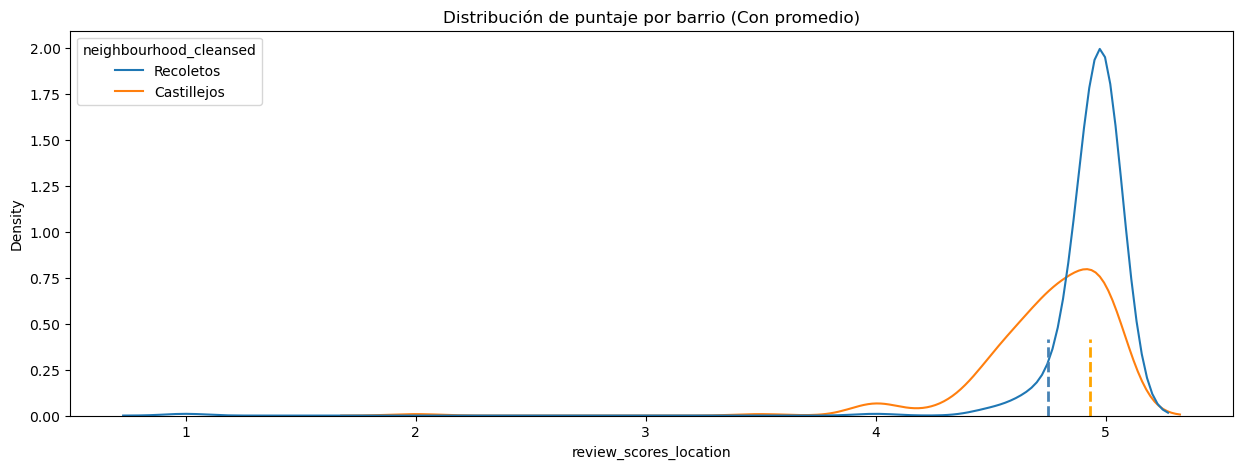

In [42]:
#Grafica de distribución de barrio por puntaje
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(
    data=listings_df.loc[listings_df["neighbourhood_cleansed"].isin(barrio_mayor_precio)],
    x="review_scores_location",
    hue="neighbourhood_cleansed",
    ax=ax
)
for (puntaje_barrio, color) in zip(barrio_mayor_precio, ["steelblue", "orange"]):
    ax.axvline(listings_df.loc[listings_df["neighbourhood_cleansed"] == puntaje_barrio, "review_scores_location"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de puntaje por barrio (Con promedio)")
plt.show()

In [43]:
alpha_p2 = 0.05    #Valor asumido para responder la hipotesis nula

In [44]:
#Para resolver la hipotesis nula se va a utilizar el test de Mann-Whitney, debido a que no se tiene una distribución normal por parte de las variables
stat, p_value = mannwhitneyu(
    listings_df.loc[listings_df["neighbourhood_cleansed"] == barrio_mayor_precio[0], "review_scores_location"],
    listings_df.loc[listings_df["neighbourhood_cleansed"] == barrio_mayor_precio[1], "review_scores_location"]
)

In [45]:
print('Estadístico de U:', stat)
print('Valor p:', p_value)

Estadístico de U: 14173.0
Valor p: 1.8897626555901405e-19


In [46]:
if p_value < alpha_p2:
    print(f"RECHAZA LA HIPOTESIS NULA: La diferencia en puntaje entre los barrios {barrio_mayor_precio[0]} y {barrio_mayor_precio[1]} es siginificativa")
else:
    print(f"FALLO EN RECHAZAR LA HIPOTESIS NULA: La diferencia en puntaje entre los barrios {barrio_mayor_precio[0]} y {barrio_mayor_precio[1]} no es siginificativa")

RECHAZA LA HIPOTESIS NULA: La diferencia en puntaje entre los barrios Castillejos y Recoletos es siginificativa


### Insights obtenidos
* En Madrid existe una clara predominación por el uso de casas o apartamentos completos sobre los demás, sin importar que esto implique un costo un poco mayor.
* No existe una relación directa entre el puntaje que pueda tener una vivienda, con la ubicación si se encuentra en alguno de los barrios más caros de la ciudad donde se presta el servicio.

## 5. Resultados generales

Es posible hacer la inversión en un sector no tan lujoso como lo es **Recoletos** y se podra obtener un buen resultado dentro de la aplicación, al ser uno de los barrios con mayor puntaje, dado que más clientes potenciales se encuentran dentro de estás busquedas. Teniendo en cuenta que se va a buscar principalmente el arriendo provisional de una casa o apartamento por completo, no se recomienda el uso de viviendas donde se tengan cuartos privados dado que la cantidad de personas que buscan este tipo es un poco menos de la mitad que lo hace con apartamentos o casas completas.